# **Retail Trend Forecasting Analysis**


---



**Group 8**


---

> Nagavamsidhar Reddy Guthikonda

> Anitha Burri

> Asha Reddy Bhimireddy

> Jaya Sindhu Edara

**Importing Required Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import *

**Importing and reading the data 'shopping_trends'**

In [3]:
df = pd.read_csv('shopping_trends.csv')

**Visualizing the top 5 rows from the data**

In [4]:
df.head(5) # It prints the top 5 rows with all columns in the dataset

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**Checking the data types of our columns in the dataset**

In [5]:
df.dtypes # It prints all the columns with its datatype

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

**Verifying the shape of our dataset**

In [6]:
df.shape # It prints the total records in the dataset (It is having 3900 records with 18 columns)

(3900, 18)

**Checking whether the dataset contains duplicate values or not**

In [7]:
print("Duplicates:" + str(df.duplicated().sum()))  # It prints the duplicates in the data

Duplicates:0


**To get information on each column of our dataset**

In [8]:
df.info()  # It prints the information of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

**To check the statistics of numerical columns in our dataset**

In [9]:
df.describe() # It prints the table with statistics like mean, standard deviation, count, min and max for numerical columns.

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**Printing the count of different categories in Category column**

In [10]:
df['Category'].value_counts() # It prints the number of categories with its size in the data.

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

**Visualizing average Purchase Amount in each season**

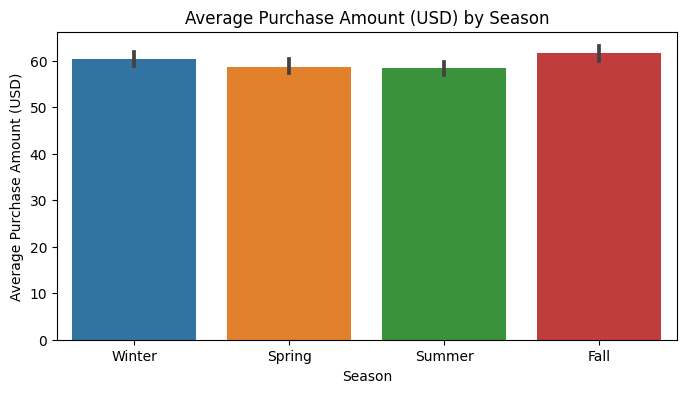

In [11]:
#Barplot
plt.figure(figsize=(8, 4)) # Assuming figure size with width as 8 inches and height as 4 inches
sns.barplot(x='Season', y='Purchase Amount (USD)', data=df) # Plotting the bar plot with season and purchase amount
plt.title('Average Purchase Amount (USD) by Season') # Title of our figure
plt.xlabel('Season') # Taking x-axis as Season
plt.ylabel('Average Purchase Amount (USD)') # Taking y-axis as average purchase amount
plt.show()

**Visualizing purchase amount by different locations**

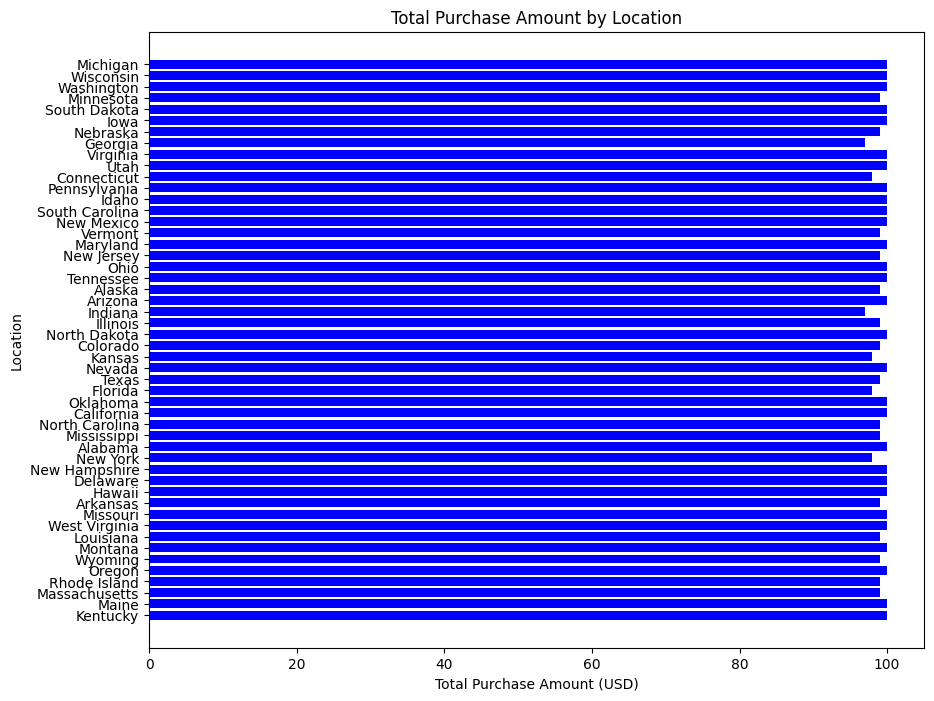

In [12]:
#Horizontal barplot
plt.figure(figsize=(10, 8)) # Assuming figure size with width as 10 inches and height as 8 inches
plt.barh(df['Location'], df['Purchase Amount (USD)'], color='blue') # plotting horizontal bar plot with location and purchase amount and setting color as blue
plt.title('Total Purchase Amount by Location') # Title of our figure
plt.xlabel('Total Purchase Amount (USD)') # Taking x-axis as purchase amount
plt.ylabel('Location') # Taking y-axis as location
plt.show()

**Visualizing the percentage of subscription status**

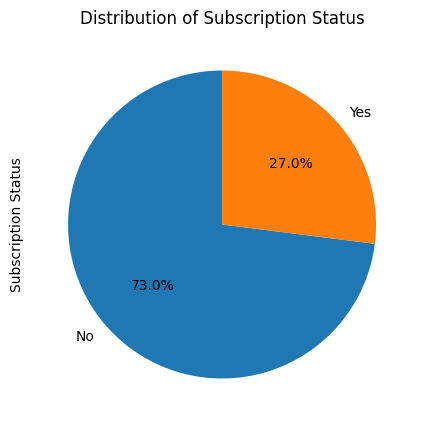

In [13]:
#Pie Chart
plt.figure(figsize=(5, 5)) # Assuming figure size with width as 5 inches and height as 5 inches
df['Subscription Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90) # Counting the number of subscriptions and plotting the pie chart
plt.title('Distribution of Subscription Status') # Title of our figure
plt.show()

**Visualizing the total purchase amount based on each category**

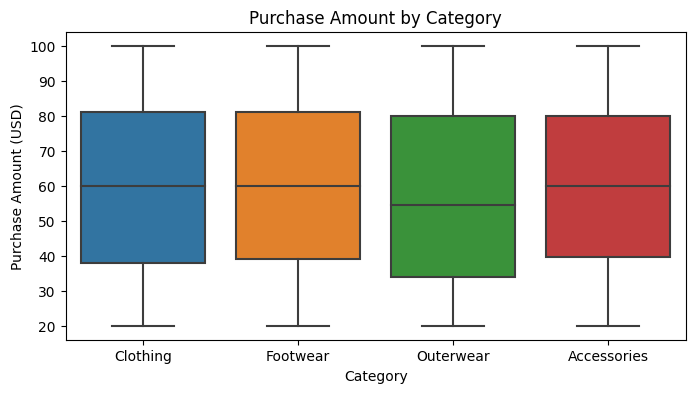

In [14]:
# Boxplot
plt.figure(figsize=(8, 4)) # Assuming figure size with width as 8 inches and height as 4 inches
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df) # Plotting the box plot with category and purchase amount
plt.title('Purchase Amount by Category') # Title of our figure
plt.xlabel('Category') # Taking x-axis as category
plt.ylabel('Purchase Amount (USD)') # Taking y-axis as purchase amount
plt.show()

**Visualizing count of all the categories in each season**

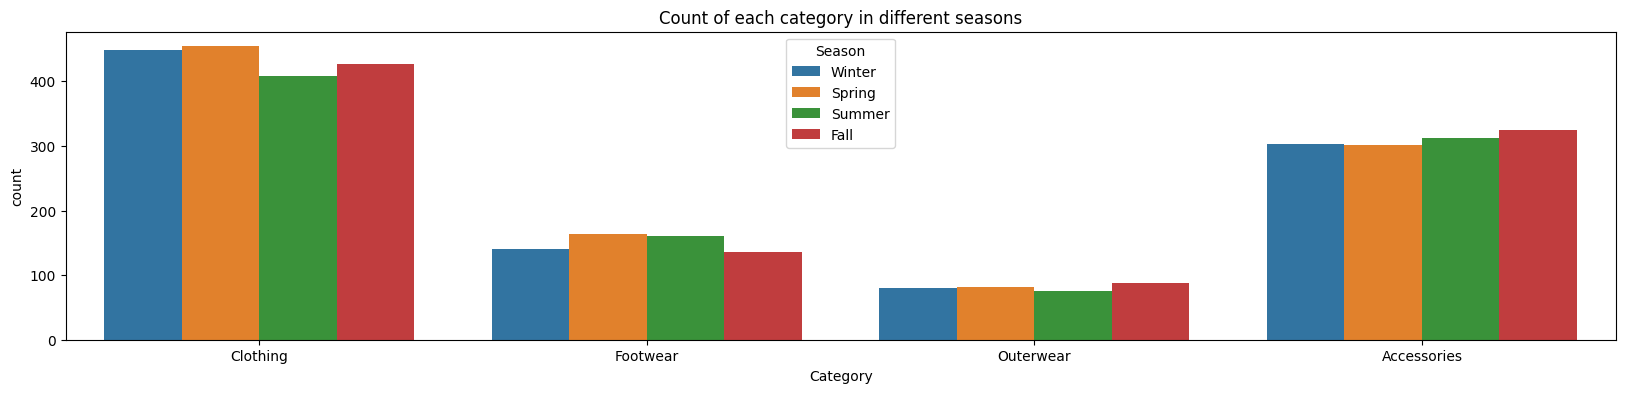

In [15]:
#Count plot
plt.figure(figsize = (20,4)) # Assuming figure size with width as 20 inches and height as 4 inches
sns.countplot(x=df['Category'],hue='Season',data=df) # plotting the count plot with category variable in different sesaons
plt.title('Count of each category in different seasons') # Title of our figure
plt.show()

**Visualizing the distribution of each category**

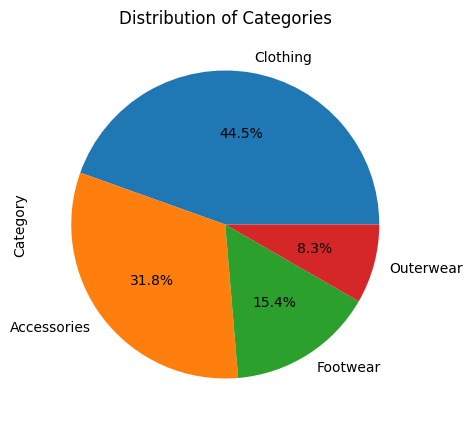

In [16]:
#Pie Chart
plt.figure(figsize=(5, 5)) # Assuming figure size with width as 5 inches and height as 5 inches
df['Category'].value_counts().plot.pie(autopct='%1.1f%%') # Counting the number of categories with their distribution and plotting pie chart
plt.title('Distribution of Categories') # Title of our figure
plt.show()

**Visualizing the distribution of ages**


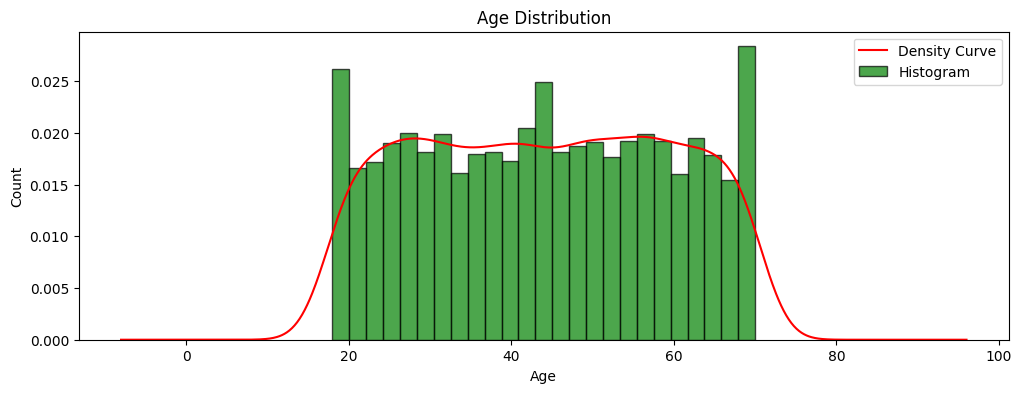

In [17]:
fig, ax = plt.subplots(figsize = (12, 4)) # Assuming figure size with width as 12 inches and height as 4 inches
ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'green', density = True) # plotting histogram with age by taking edge color as block, number of bins as
df['Age'].plot(kind = 'kde', color = 'red', ax = ax) # kde for smooth estimation of the probability function
ax.set_xlabel('Age') # Taking x-axis as Age
ax.set_ylabel('Count') # Taking y-axis as Count
ax.set_title('Age Distribution') # Title of our figure
ax.legend(['Density Curve', 'Histogram']) # Legend gives details about the elements that used in our plot
plt.show()

**Visualizing distribution of Purchase Amount**

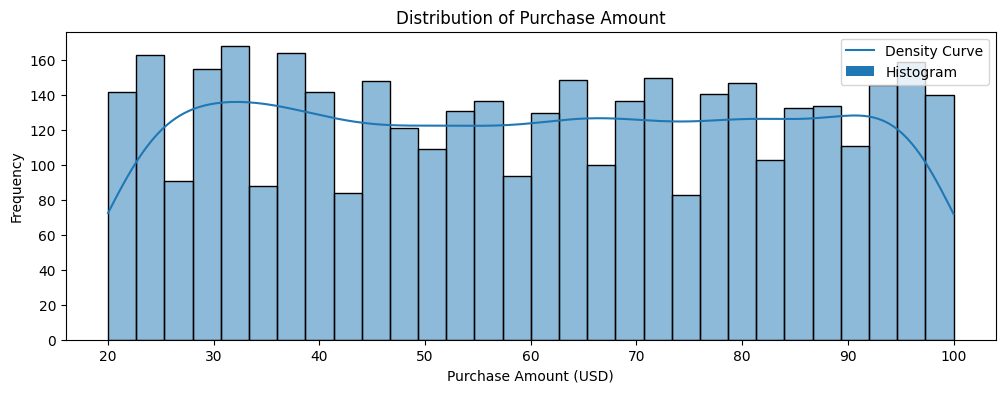

In [18]:
#Histogram and KDE plot
plt.figure(figsize=(12, 4)) # Assuming figure size with width as 12 inches and height as 4 inches
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True) # Plotting the histogram with kde and bins as 30
plt.title('Distribution of Purchase Amount') # Title of our figure
plt.xlabel('Purchase Amount (USD)') # Taking x-axis as purchase amount
plt.ylabel('Frequency') # Taking x-axis as Frequency
plt.legend(['Density Curve', 'Histogram']) # Legend gives details about the elements that used in our plot
plt.show()

**Visualizing the relationship between Purchase Amount and Age**

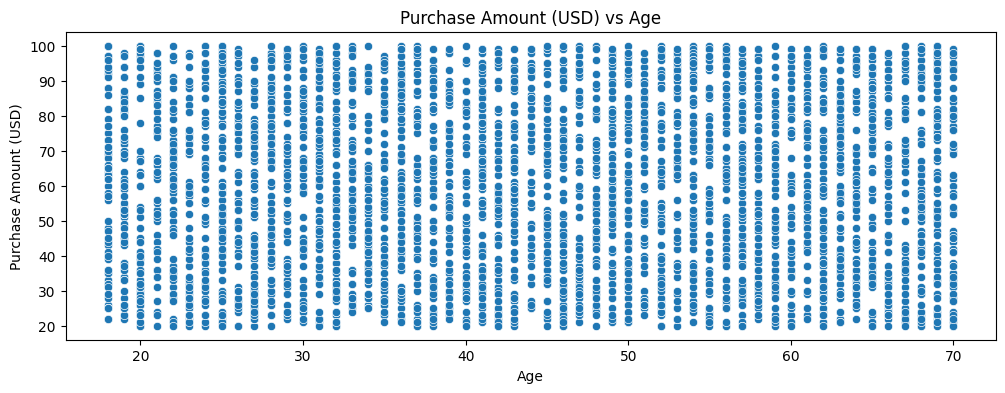

In [19]:
#Scatter plot
plt.figure(figsize=(12, 4)) # Assuming figure size with width as 12 inches and height as 4 inches
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df) # Plotting the scatter plot with age and purchase amount
plt.title('Purchase Amount (USD) vs Age') # Title of our figure
plt.xlabel('Age') # Taking x-axis as Age
plt.ylabel('Purchase Amount (USD)') # Taking x-axis as purchase amount
plt.show()

**Visualizing Purchase Amount based on Gender**

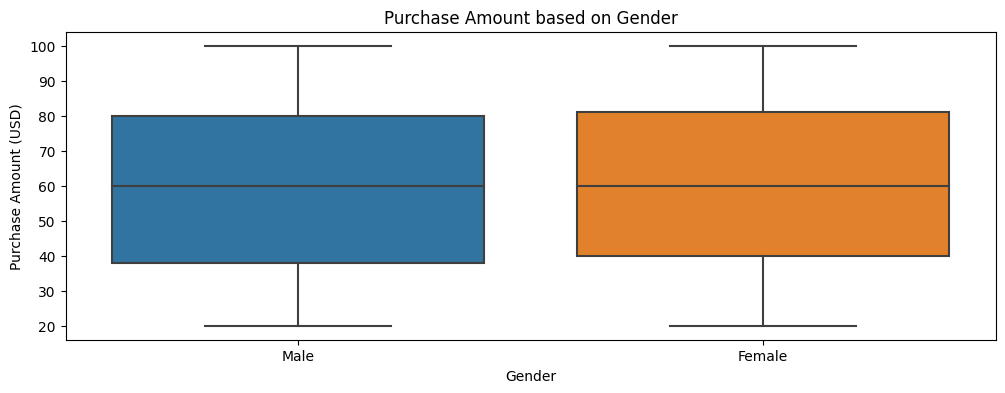

In [20]:
#Boxplot
plt.figure(figsize=(12, 4)) # Assuming figure size with width as 12 inches and height as 4 inches
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df) # Plotting the box plot using purchase amount based on gender
plt.title('Purchase Amount based on Gender') # Title of our figure
plt.xlabel('Gender') # Taking x-axis as Gender
plt.ylabel('Purchase Amount (USD)') # Taking x-axis as purchase amount
plt.show()

**Visualizing relationship between selected columns**

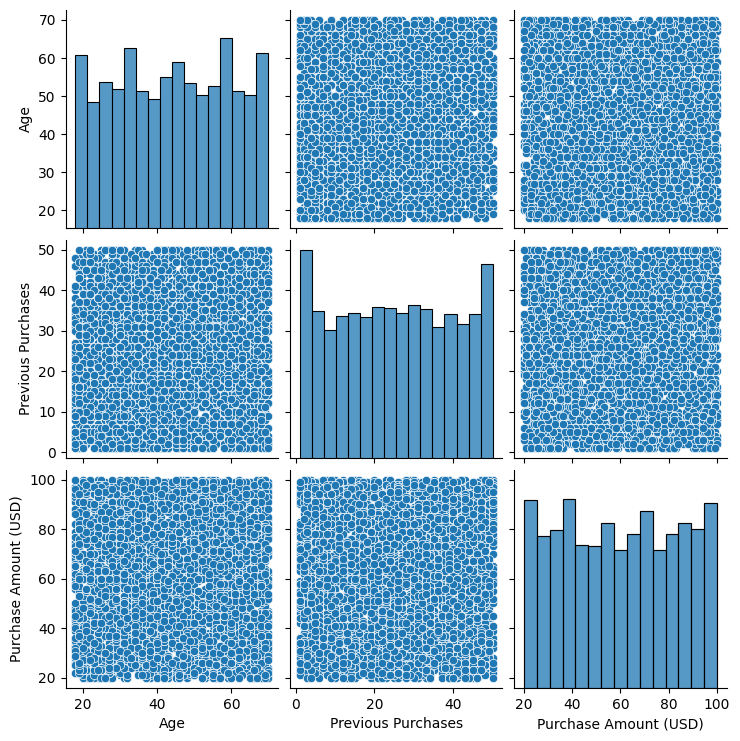

In [21]:
#pair plot
pair_col = ['Age', 'Previous Purchases', 'Purchase Amount (USD)'] # Taking the required columns into 'pair_col'
sns.pairplot(df[pair_col]) # Plotting the pair plot using the above pair_col
plt.show()

**Creating new features and extracting it**

In [22]:
customer = ['Age', 'Gender'] # Creating customer feature with age and gender columns
product = ['Item Purchased', 'Category', 'Size', 'Color'] # Creating product feature with item purchased, age, size and color columns
season = ['Season'] # Creating season feature with season column
location = ['Location'] # Creating location feature with location column
purchase = ['Previous Purchases', 'Frequency of Purchases', 'Review Rating'] # Creating purchase feature with item previous purchases, frequency of purchases and review rating columns
subscription = ['Subscription Status'] # Creating subscription feature with Subscription status column
payment = ['Payment Method', 'Discount Applied', 'Promo Code Used'] # Creating payment feature with payment method, discount applied and promocode used columns

**Creating new feature (Calculating average purchase amount per customer)**

In [23]:
#Creature new column 'Average Purchase Amount' by using purchase amount column and calculating mean
df['Average Purchase Amount (USD)'] = df.groupby('Customer ID')['Purchase Amount (USD)'].transform('mean')

In [24]:
# Taking all the required features into single feature
feature = (
    customer + product + season +
    location + purchase + subscription + payment + ['Average Purchase Amount (USD)'])

In [25]:
X = df[feature] # Independent variable
y = df['Purchase Amount (USD)'] # Dependent variable

**Numerical columns**

In [26]:
numerical_col = X.select_dtypes(include=['int64', 'float64']).columns

**Categorical columns**

In [27]:
categorical_col = X.select_dtypes(include=['object']).columns

**Defining the pipeline for both features**

In [28]:
# Creating a pipeline for numeric features by imputing it with mean
num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creating a pipeline for categorical features by imputing it with most frequent stratergies and applying one-hot encoding
cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [29]:
# Defining preprocessor with ColumnTransfomer using numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num, numerical_col),
        ('cat', cat, categorical_col)
    ])

In [30]:
X = preprocessor.fit_transform(X) # we are using preprocessor to transform the input data X

**Splitting the data for Training and Testing**

In [31]:
#Here we are using 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression Model**

In [32]:
lr_model = LinearRegression()  # Linear Regression Model
lr_model.fit(X_train, y_train)

LinearRegression()

**Training the data**

In [33]:
def training(model, X_train, y_train):
    values = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # we are performing cross validation for our model
    rmse_value = np.sqrt(-values) # root mean square value
    print(f'Cross-Validation RMSE: {rmse_value.mean()}')

In [34]:
training(lr_model, X_train, y_train) # Training the model

Cross-Validation RMSE: 8.207328878868884e-05


**Testing the data**

In [59]:
def testing(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse_value = mean_squared_error(y_test, y_pred) # mean squared error value
    rmse_value = np.sqrt(mse_value) # root mean square error value
    mae_value = mean_absolute_error(y_test, y_pred) # mean absolute error value
    r2_value = r2_score(y_test, y_pred) # r squared value
    print(f"\n{type(model).__name__} Model:")
    print(f'Mean Squared Error: {mse_value}')
    print(f'Root Mean Squared Error: {rmse_value}')
    print(f'Mean Absolute Error: {mae_value}')
    print(f'R2 score: {r2_value}')

In [66]:
testing(lr_model, X_test, y_test) # Testing the model


LinearRegression Model:
Mean Squared Error: 2.866020598975772e-09
Root Mean Squared Error: 5.3535227644755295e-05
Mean Absolute Error: 4.061858894066571e-05
R2 score: 0.9999999999948783


**Decision Tree Regressor Model**

In [46]:
dtr_model = DecisionTreeRegressor(max_depth=3) # Decision Tree Regressor Model
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

**Training the Data**

In [47]:
def training(model, X_train, y_train):
    values = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # we are performing cross validation for our model
    rmse_value = np.sqrt(-values) # root mean square value
    print(f'Cross-Validation RMSE: {rmse_value.mean()}')

In [48]:
training(dtr_model, X_train, y_train)

Cross-Validation RMSE: 2.927746668757277


**Testing the Data**

In [61]:
def testing(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse_value = mean_squared_error(y_test, y_pred) # mean squared error value
    rmse_value = np.sqrt(mse_value) # root mean square error value
    mae_value = mean_absolute_error(y_test, y_pred) # mean absolute error value
    r2_value = r2_score(y_test, y_pred) # r squared value
    print(f"\n{type(model).__name__} Model:")
    print(f'Mean Squared Error: {mse_value}')
    print(f'Root Mean Squared Error: {rmse_value}')
    print(f'Mean Absolute Error: {mae_value}')
    print(f'R2 score: {r2_value}')

In [67]:
testing(dtr_model, X_test, y_test) # Testing the model


DecisionTreeRegressor Model:
Mean Squared Error: 8.147819628140796
Root Mean Squared Error: 2.854438583704473
Mean Absolute Error: 2.4564787998420696
R2 score: 0.9854394633590645


**Analysis**

> We got R2 square for Linear Regression model as 0.999 and Decision Tree Regressor as 0.985.

> From the performance metrics, It clearly shows that the linear regression model is better than decision tree regressor model.

> The linear regression model is performing well in showcasing its ability while capturing the trends in the data.
